<a href="https://colab.research.google.com/github/orelebile/Coursera-test/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Three questions to investigate
# 1. Which crimes are common (Knowing the most frequent crimes helps identify public safety priorities and trends)
# 2. How does crime vary by time (Helps understand when crimes are most likely to occur, useful for law enforcement scheduling and public awareness.)
# 3. Which community areas have the highest crime rates (Helps identify neighborhoods most affected and where interventions are needed)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data=pd.read_csv('/content/Crimes_-_One_year_prior_to_present.csv')

#crime_data.info()

crime_data.head(5)


,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JJ205388,04/03/2025 10:50:00 PM,049XX W SCHUBERT AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,N,Y,2521.0,31.0,14,1143030.0,1917505.0,41.929679,-87.749824,"(41.929678531, -87.749824286)"
1,JJ160428,02/24/2025 10:40:00 AM,059XX N GLENWOOD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SCHOOL - PUBLIC BUILDING,N,Y,2013.0,48.0,08B,1165910.0,1939379.0,41.989244,-87.665120,"(41.989243623, -87.665119726)"
2,JJ149631,02/14/2025 02:45:00 PM,054XX S WENTWORTH AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,N,N,225.0,20.0,06,1175887.0,1869033.0,41.795991,-87.630542,"(41.795991039, -87.630542489)"
3,JJ212183,04/07/2025 05:00:00 PM,075XX S STONY ISLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,N,Y,411.0,8.0,08B,1188234.0,1855158.0,41.757631,-87.585708,"(41.757630995, -87.585708249)"
4,JJ189129,03/19/2025 01:00:00 PM,021XX N MOZART ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,N,1414.0,1.0,14,1156975.0,1914091.0,41.920038,-87.698673,"(41.920038401, -87.698672834)"


In [ ]:
crime_data.shape
# the data frame contains 171666 rows and 17 columns

(171666, 17)

In [ ]:
crime_data.info()
#undersatnding the varriables in a data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   171666 non-null  object 
 1   DATE  OF OCCURRENCE     171662 non-null  object 
 2   BLOCK                   171662 non-null  object 
 3    IUCR                   171662 non-null  object 
 4    PRIMARY DESCRIPTION    171662 non-null  object 
 5    SECONDARY DESCRIPTION  171662 non-null  object 
 6    LOCATION DESCRIPTION   170847 non-null  object 
 7   ARREST                  171661 non-null  object 
 8   DOMESTIC                171661 non-null  object 
 9   BEAT                    171661 non-null  float64
 10  WARD                    171661 non-null  float64
 11  FBI CD                  171661 non-null  object 
 12  X COORDINATE            171572 non-null  float64
 13  Y COORDINATE            171572 non-null  float64
 14  LATITUDE            

In [ ]:
crime_data.describe()

,BEAT,WARD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,171661.000000,171661.000000,1.715720e+05,1.715720e+05,171572.000000,171572.000000
mean,1141.881039,22.983683,1.165763e+06,1.887088e+06,41.845742,-87.667196
std,705.910030,13.932986,1.624608e+04,3.135949e+04,0.086237,0.059155
min,111.000000,1.000000,1.094182e+06,1.813909e+06,41.644608,-87.928903
25%,531.000000,10.000000,1.154465e+06,1.860163e+06,41.771722,-87.708254
50%,1031.000000,23.000000,1.167716e+06,1.893394e+06,41.863072,-87.659929
75%,1731.000000,34.000000,1.176943e+06,1.909696e+06,41.908132,-87.626218
max,2535.000000,50.000000,1.205117e+06,1.951517e+06,42.022559,-87.524532


In [ ]:
crime_data.isnull().sum()
#identifying data issues such as a empty entries or NaN entries


,0
CASE#,0
DATE OF OCCURRENCE,4
BLOCK,4
IUCR,4
PRIMARY DESCRIPTION,4
SECONDARY DESCRIPTION,4
LOCATION DESCRIPTION,819
ARREST,5
DOMESTIC,5
BEAT,5


In [ ]:
crime_data.duplicated().sum()
# np.int64(3) means there are 3 duplicated rows in the crime_data.

np.int64(3)

In [ ]:
# Clean column names: strip whitespace and replace multiple spaces with single space
crime_data.columns = crime_data.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Now, convert 'DATE OF OCCURRENCE' column (after cleaning)
crime_data['DATE OF OCCURRENCE'] = pd.to_datetime(
    crime_data['DATE OF OCCURRENCE'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

crime_data.dtypes
#confirming if date formating worked and it worked :)

,0
CASE#,object
DATE OF OCCURRENCE,datetime64[ns]
BLOCK,object
IUCR,object
PRIMARY DESCRIPTION,object
SECONDARY DESCRIPTION,object
LOCATION DESCRIPTION,object
ARREST,object
DOMESTIC,object
BEAT,float64


In [ ]:
crime_data['DATE OF OCCURRENCE'].tail(10)
# it worked :)

,DATE OF OCCURRENCE
171656,2025-07-06 10:00:00
171657,2025-08-09 01:00:00
171658,2025-07-30 03:35:00
171659,2025-08-23 21:30:00
171660,2025-09-10 10:30:00
171661,2025-06-30 20:22:00
171662,NaT
171663,NaT
171664,NaT
171665,NaT


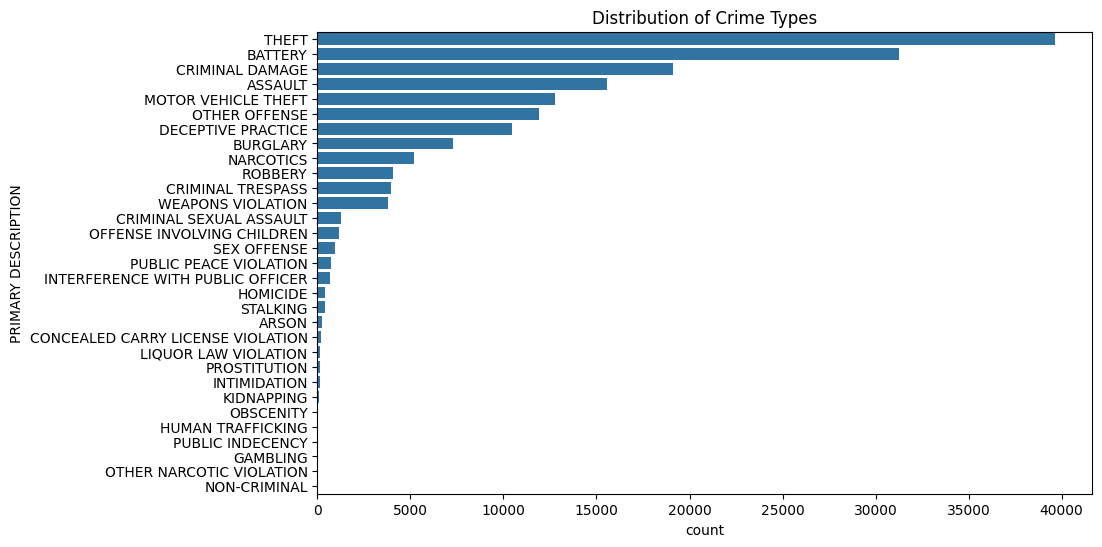

In [ ]:
#ADDRESSING CRIMES MOST COMMON IN CHICAGO (BAR CHART)
plt.figure(figsize=(10,6))
sns.countplot(y='PRIMARY DESCRIPTION',
              data=crime_data,
              order=crime_data['PRIMARY DESCRIPTION'].value_counts().index)
plt.title("Distribution of Crime Types")
plt.show()

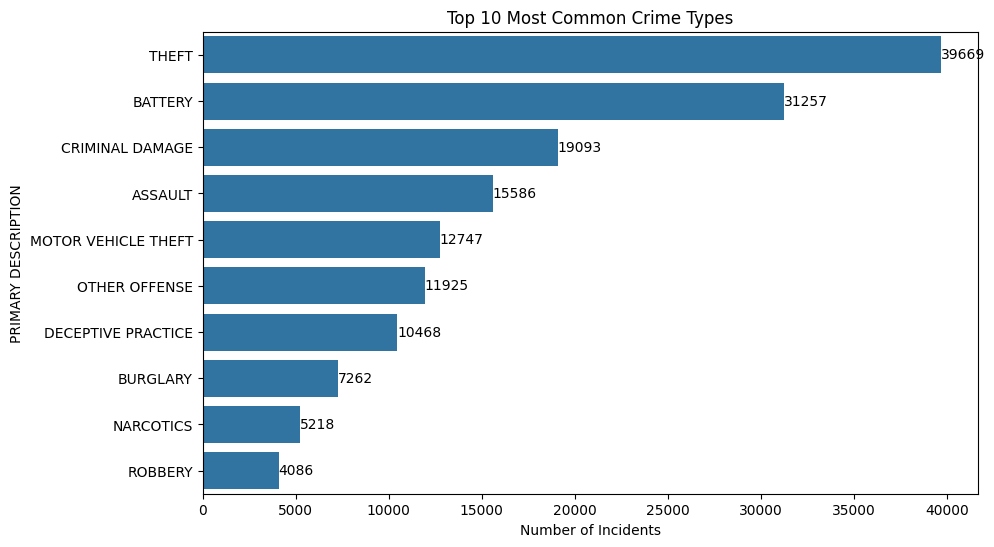

In [ ]:
#REFINING THE VISUALIZATION TO TOP TEN CRIMES
top10 = crime_data['PRIMARY DESCRIPTION'].value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top10.values, y=top10.index)

plt.title("Top 10 Most Common Crime Types")
plt.xlabel("Number of Incidents")
for i, value in enumerate(top10.values):
    ax.text(value, i, str(value), va='center')

plt.show()

#The most common crime in chicago is Theft, followed by battery, then criminal damage, assault, motor vehicle theft and so on...

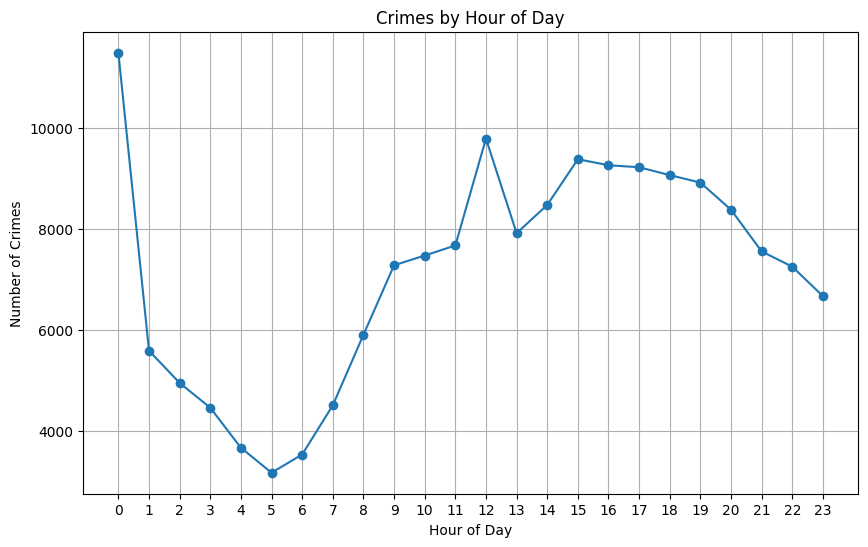

In [ ]:
#ADDRESSING HOW CRIME VARY BY TIME
crime_data['Hour'] = crime_data['DATE OF OCCURRENCE'].dt.hour

# Count crimes per hour
hourly_counts = crime_data.groupby('Hour').size()

plt.figure(figsize=(10,6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')

plt.title("Crimes by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.grid(True)

plt.show()

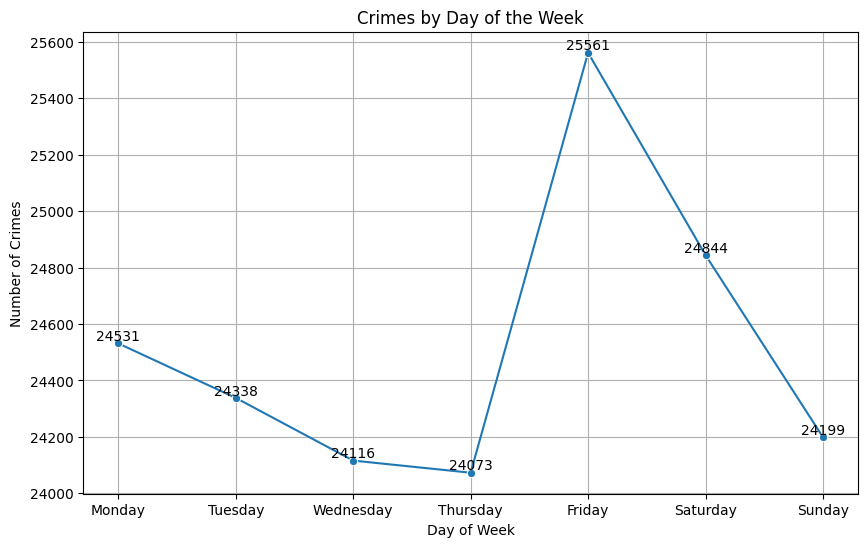

In [ ]:
#REFINING BY DAYS
crime_data['DayOfWeek'] = crime_data['DATE OF OCCURRENCE'].dt.day_name()

dow_counts = crime_data['DayOfWeek'].value_counts().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

plt.figure(figsize=(10,6))
sns.lineplot(x=dow_counts.index, y=dow_counts.values, marker='o')
plt.title("Crimes by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.grid(True)

for x, y in zip(dow_counts.index, dow_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

#MOST CRIMES HAPPEN ON FRIDAYS

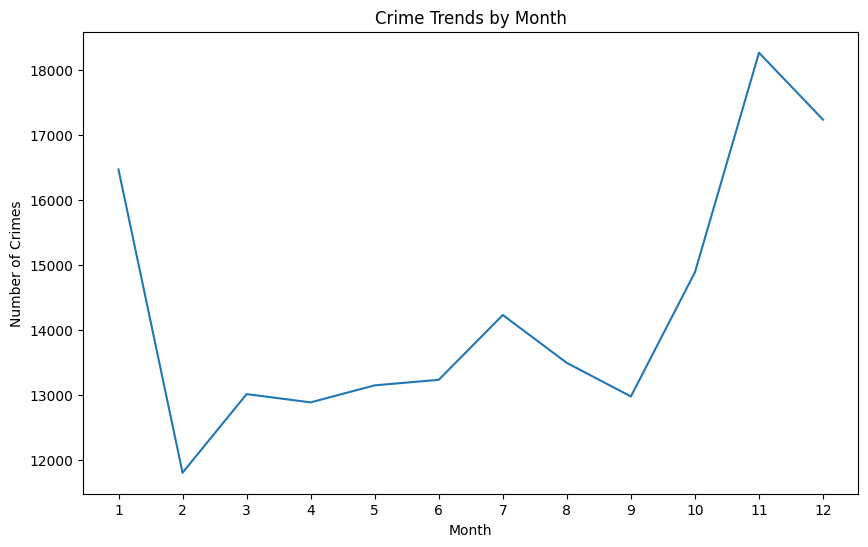

In [ ]:

crime_data['Month'] = crime_data['DATE OF OCCURRENCE'].dt.month

# Count crimes per month
monthly = crime_data.groupby('Month').size().sort_index()

# Line plot
plt.figure(figsize=(10,6))
plt.plot(monthly.index, monthly.values)
plt.title("Crime Trends by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13))
plt.show()

#MOST CRIME HAPPEN IN NOVEMBER FOLLOWED BY DECEMBER

/tmp/ipython-input-465756350.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.index, y=top_areas.values, palette="viridis")


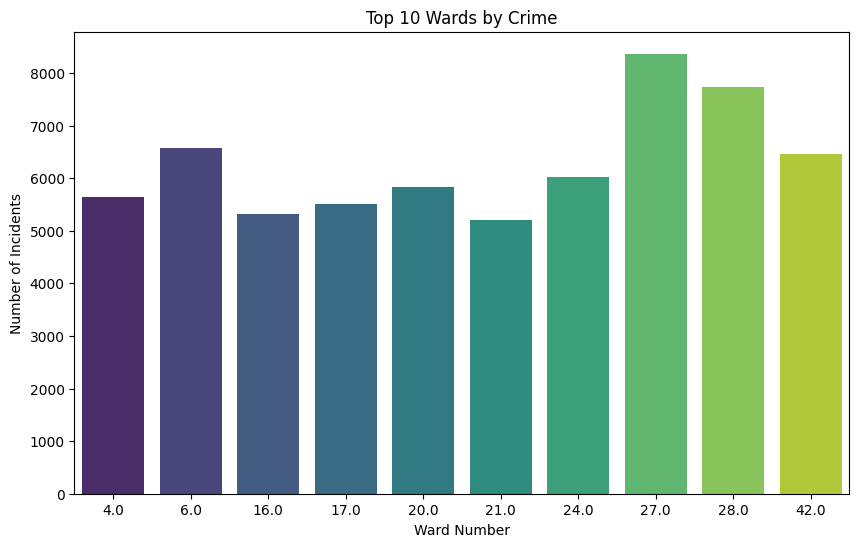

In [ ]:
#ADDRESSING WHICH AREAS HAS THE MOST CRIME

itop_areas = crime_data['WARD'].value_counts().head(10).sort_values(ascending=False)

plt.figure(figsize=(10,6))

# Vertical bar chart
sns.barplot(x=top_areas.index, y=top_areas.values, palette="viridis")

plt.title("Top 10 Wards by Crime")
plt.xlabel("Ward Number")
plt.ylabel("Number of Incidents")

plt.show()

#most crime happen in ward 27, followed by ward 28 and ward 6

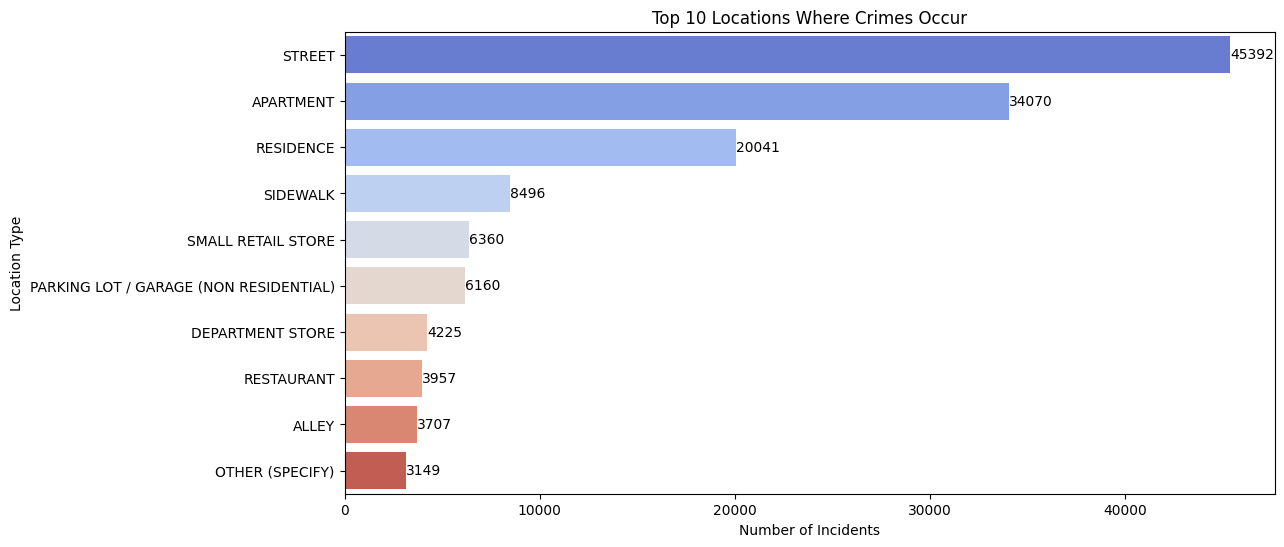

In [ ]:
#ADDRESSING TOP LOCATIONS WHERE CRIMES OCCUR
top_locations = crime_data['LOCATION DESCRIPTION'].value_counts().head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_locations.values, y=top_locations.index, hue=top_locations.index, palette="coolwarm", legend=False)
plt.title("Top 10 Locations Where Crimes Occur")
plt.xlabel("Number of Incidents")
plt.ylabel("Location Type")

for i, value in enumerate(top_locations.values):
    ax.text(value + 5, i, str(value), va='center')

plt.show()

#MOST CRIMES HAPPEN IN THE STREET FOLLOWED BY APARTMENT, RESIDENCE AND SIDEWALK

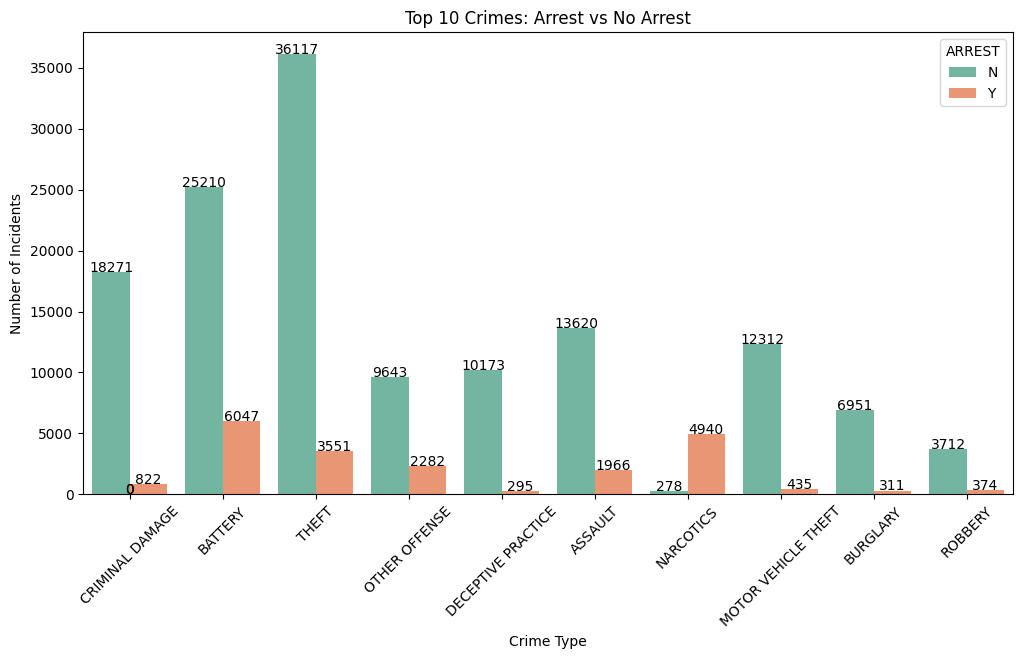

In [ ]:
# Take top 10 crime types for clarity
top_crimes = crime_data['PRIMARY DESCRIPTION'].value_counts().head(10)
subset = crime_data[crime_data['PRIMARY DESCRIPTION'].isin(top_crimes.index)]

plt.figure(figsize=(12,6))
ax = sns.countplot(x='PRIMARY DESCRIPTION', hue='ARREST', data=subset, palette="Set2")
plt.title("Top 10 Crimes: Arrest vs No Arrest")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 5, int(height), ha="center")

plt.show()

#crime with most arrrests are battery crime, followed by narcotics